In [ ]:

import pandas 
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [ ]:

# load dataset
df= pandas.read_csv("/content/PitchPineMortality.csv")

In [ ]:
df


,Shortname,CLASS,Status,Fire,Type,Diameter_cm,Height_m,2013 status,2014 Status,Response
0,B5-012814-1,1,Pre,0,nf,14,5,live,live,0
1,B5-012814-1,1,Pre,0,nf,13,7,live,live,0
2,B5-012814-1,1,Pre,0,nf,5,3,live,live,0
3,B5-012814-1,1,Pre,0,nf,13,7,live,live,0
4,B5-012814-1,1,Pre,0,nf,6,4,live,live,0
...,...,...,...,...,...,...,...,...,...,...
2653,WW3,1,Pre,1,rxb,11,10,live,live,0
2654,WW3,1,Pre,1,rxb,23,14,live,live,0
2655,WW3,1,Pre,1,rxb,10,10,live,live,0
2656,WW3,1,Pre,1,rxb,15,13,live,live,0


In [ ]:
df.columns

Index(['Shortname', 'CLASS', 'Status', 'Fire', 'Type', 'Diameter_cm',
       'Height_m', '2013 status', '2014 Status', 'Response'],
      dtype='object')

In [ ]:

# generate binary values using get_dummies
df = pandas.get_dummies(df, columns=["Type"], prefix=["Type is"] )
df = pandas.get_dummies(df, columns=["Status"], prefix=["Status is"] )
df

,Shortname,CLASS,Fire,Diameter_cm,Height_m,2013 status,2014 Status,Response,Type is_nf,Type is_rxb,Type is_wf,Status is_Plus 1,Status is_Post+1,Status is_Pre
0,B5-012814-1,1,0,14,5,live,live,0,1,0,0,0,0,1
1,B5-012814-1,1,0,13,7,live,live,0,1,0,0,0,0,1
2,B5-012814-1,1,0,5,3,live,live,0,1,0,0,0,0,1
3,B5-012814-1,1,0,13,7,live,live,0,1,0,0,0,0,1
4,B5-012814-1,1,0,6,4,live,live,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653,WW3,1,1,11,10,live,live,0,0,1,0,0,0,1
2654,WW3,1,1,23,14,live,live,0,0,1,0,0,0,1
2655,WW3,1,1,10,10,live,live,0,0,1,0,0,0,1
2656,WW3,1,1,15,13,live,live,0,0,1,0,0,0,1


In [ ]:
x=df[['CLASS', 'Fire', 'Diameter_cm', 'Height_m',
       'Response', 'Type is_nf', 'Type is_rxb', 'Type is_wf',
       'Status is_Plus 1', 'Status is_Post+1', 'Status is_Pre']]

y=df["Response"]     

In [ ]:
x=x.astype(float)
x.columns
len(x)

2658

In [ ]:

from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
oversample = RandomOverSampler(sampling_strategy=0.5)
X, Y = oversample.fit_resample(x, y)
len(X)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


3453

In [ ]:
	model = Sequential()
	model.add(Dense(11, input_dim=11, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit(X, Y, epochs=40, batch_size=128,validation_split=0.25)

Epoch 1/40
21/21 [==============================] - 0s 7ms/step - loss: 5.3650 - accuracy: 0.1290 - val_loss: 0.7121 - val_accuracy: 0.8113
Epoch 2/40
21/21 [==============================] - 0s 2ms/step - loss: 4.1783 - accuracy: 0.1267 - val_loss: 0.7858 - val_accuracy: 0.7106
Epoch 3/40
21/21 [==============================] - 0s 2ms/step - loss: 3.0447 - accuracy: 0.1367 - val_loss: 1.0643 - val_accuracy: 0.4144
Epoch 4/40
21/21 [==============================] - 0s 2ms/step - loss: 1.9636 - accuracy: 0.2314 - val_loss: 1.6562 - val_accuracy: 0.1458
Epoch 5/40
21/21 [==============================] - 0s 2ms/step - loss: 1.1661 - accuracy: 0.4898 - val_loss: 2.3167 - val_accuracy: 0.0845
Epoch 6/40
21/21 [==============================] - 0s 2ms/step - loss: 0.7645 - accuracy: 0.6829 - val_loss: 2.7109 - val_accuracy: 0.0845
Epoch 7/40
21/21 [==============================] - 0s 2ms/step - loss: 0.6103 - accuracy: 0.7748 - val_loss: 2.7283 - val_accuracy: 0.0775
Epoch 8/40
21/21 [==

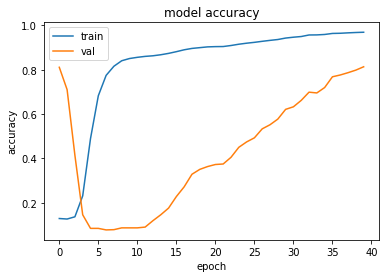

In [ ]:

import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

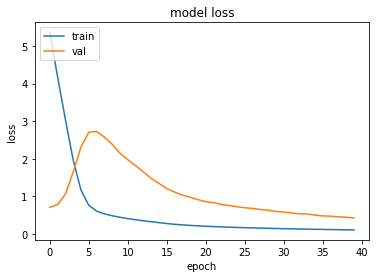

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()